In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display

In [6]:
duke_file = 'duke.wav'
ipd.Audio(duke_file)
y, sr = librosa.load(duke_file)
sr

22050

In [3]:
FRAME_SIZE = 2048
HOP_LENGTH = 512

y_spec = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

## 计算BandENergy Ratio

In [8]:
def calculate_split_frequency_bin(split_frequency, sample_rate, n_fft):
    return int(split_frequency / (sample_rate / n_fft))

In [9]:
split_frequency_bin = calculate_split_frequency_bin(2000, sr, FRAME_SIZE)
split_frequency_bin

185

In [10]:
def band_energy_ratio(y_spec, split_frequency_bin):
    band_energy_ratios = []
    for i in range(y_spec.shape[1]):
        low_band_energy = np.sum(np.abs(y_spec[:split_frequency_bin, i])**2)
        high_band_energy = np.sum(np.abs(y_spec[split_frequency_bin:, i])**2)
        if high_band_energy == 0:
            band_energy_ratio = 0
        else:
            band_energy_ratio = low_band_energy / high_band_energy
        band_energy_ratios.append(band_energy_ratio)
    return band_energy_ratios

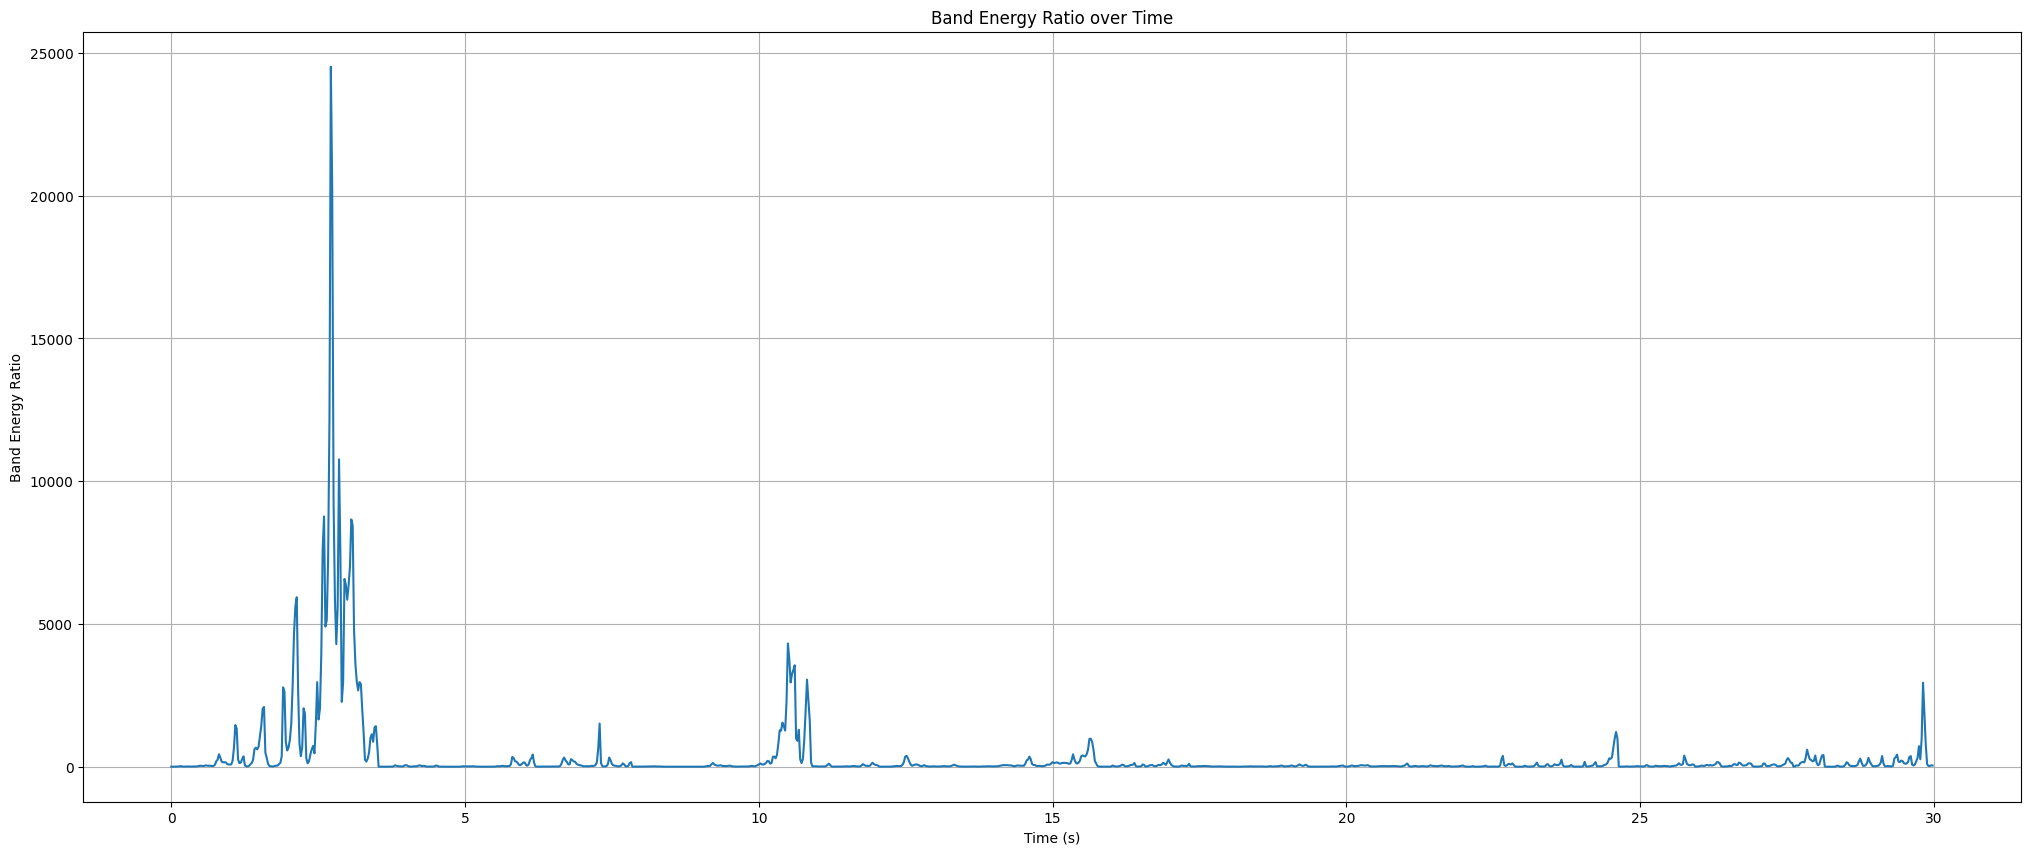

In [11]:
ber_duke = band_energy_ratio(y_spec, split_frequency_bin)
frames = range(len(ber_duke))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.figure(figsize=(25, 10))
plt.plot(t, ber_duke)
plt.xlabel('Time (s)')
plt.ylabel('Band Energy Ratio')
plt.title('Band Energy Ratio over Time')
plt.grid()

## spectral centroid 

In [12]:
sc_y = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

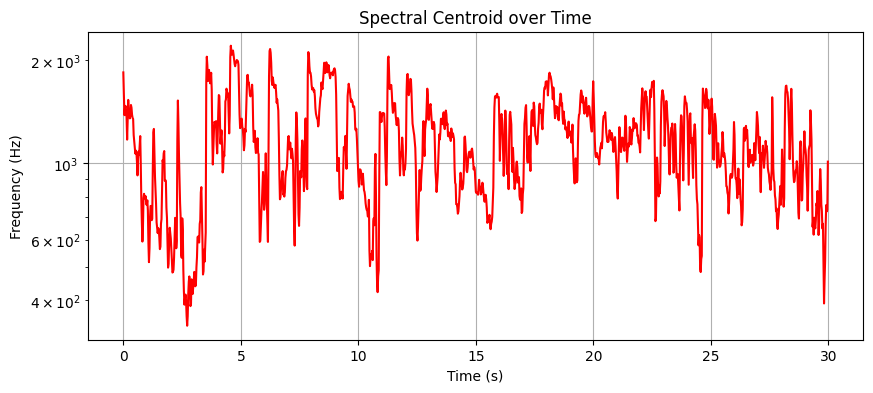

In [13]:
plt.figure(figsize=(10, 4))
plt.semilogy(t, sc_y, label='Spectral Centroid', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Centroid over Time')
plt.grid()

## spectral bandwidth

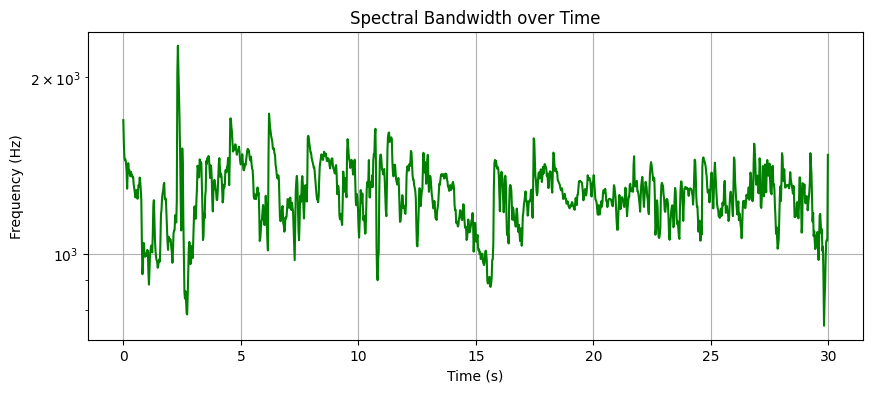

In [14]:
ban_y = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
plt.figure(figsize=(10, 4))
plt.semilogy(t, ban_y, label='Spectral Bandwidth', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Bandwidth over Time')
plt.grid()